In [287]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
all_files = glob.glob(r'C:\Users\sathvis\Desktop\p1_ips_data'+"/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)
frame12 = pd.concat(li, axis=0, ignore_index=True)

In [4]:
frame12.columns

Index(['customer_id', 'device_ip', 'interface', 'metric_text', 'date', 'time',
       'hostname', 'metric_uid', 'value'],
      dtype='object')

In [5]:
frame12.metric_text.unique()

array(['Availability', 'Win-CPU Load', 'Mem Usage Load', 'CPU Load',
       'Swap Mem Usage', 'CiscoMemoryUtilization', 'CiscoTemperature',
       'PacketLoss', 'RouterCPUUtilization', 'ResponseTime',
       'CiscoCPUUtilization_total_1M', 'CPUUtilization',
       'Total Memory Free', 'Total Memory Used', 'Disk Usage: Per Drive',
       'Memory Usage', 'Processor Usage'], dtype=object)

In [6]:
frame12.device_ip.unique()

array(['10.254.228.8', '192.168.224.3', '10.254.231.7', '10.254.208.5',
       '192.168.242.6', '10.51.30.15', '10.54.34.34', '10.54.30.13',
       '172.16.92.1', '192.168.14.132', '10.157.30.11'], dtype=object)

In [255]:
sam2=frame12[frame12['device_ip']=='10.254.208.5']

In [226]:
sam2.head()

,customer_id,device_ip,interface,metric_text,date,time,hostname,metric_uid,value
65424,SCBATMS87816,10.254.208.5,NaN,CiscoTemperature,2019-04-10 00:00:00,2019-04-10 00:00:00,ANBLR-SW02,N31:P24,0.0
65425,SCBATMS87816,10.254.208.5,NaN,CiscoTemperature,2019-04-10 00:00:00,2019-04-10 00:01:00,ANBLR-SW02,N31:P24,0.0
65426,SCBATMS87816,10.254.208.5,NaN,CiscoTemperature,2019-04-10 00:00:00,2019-04-10 00:02:00,ANBLR-SW02,N31:P24,0.0
65427,SCBATMS87816,10.254.208.5,NaN,CiscoTemperature,2019-04-10 00:00:00,2019-04-10 00:03:00,ANBLR-SW02,N31:P24,0.0
65428,SCBATMS87816,10.254.208.5,NaN,CiscoTemperature,2019-04-10 00:00:00,2019-04-10 00:04:00,ANBLR-SW02,N31:P24,0.0


In [256]:
sam2.metric_text.unique()

array(['CiscoTemperature', 'Availability', 'ResponseTime', 'PacketLoss'],
      dtype=object)

In [82]:
sam1=frame12[frame12['device_ip']=='10.254.228.8'][['time','metric_text','value']]

In [214]:
#sam2=frame12[frame12['device_ip']=='10.254.231.7'][['time','metric_text','value']]

In [215]:
#sam2[sam2['time']=='2019-05-01 00:00:00']

,time,metric_text,value
2741298,2019-05-01 00:00:00,Availability,1.0


In [229]:
sam2.metric_text.unique()

array(['CiscoTemperature', 'Availability', 'ResponseTime', 'PacketLoss'],
      dtype=object)

In [171]:
sam2.metric_text.unique()

array(['Availability', 'CiscoMemoryUtilization', 'CiscoTemperature',
       'PacketLoss', 'RouterCPUUtilization', 'ResponseTime'], dtype=object)

In [257]:
sam2.head()

,customer_id,device_ip,interface,metric_text,date,time,hostname,metric_uid,value
65424,SCBATMS87816,10.254.208.5,NaN,CiscoTemperature,2019-04-10 00:00:00,2019-04-10 00:00:00,ANBLR-SW02,N31:P24,0.0
65425,SCBATMS87816,10.254.208.5,NaN,CiscoTemperature,2019-04-10 00:00:00,2019-04-10 00:01:00,ANBLR-SW02,N31:P24,0.0
65426,SCBATMS87816,10.254.208.5,NaN,CiscoTemperature,2019-04-10 00:00:00,2019-04-10 00:02:00,ANBLR-SW02,N31:P24,0.0
65427,SCBATMS87816,10.254.208.5,NaN,CiscoTemperature,2019-04-10 00:00:00,2019-04-10 00:03:00,ANBLR-SW02,N31:P24,0.0
65428,SCBATMS87816,10.254.208.5,NaN,CiscoTemperature,2019-04-10 00:00:00,2019-04-10 00:04:00,ANBLR-SW02,N31:P24,0.0


In [258]:
 sam2.index=pd.to_datetime(sam2['time'])
 sam2=sam2.drop(['time'],axis=1)   

In [259]:
sam2.head()

,customer_id,device_ip,interface,metric_text,date,hostname,metric_uid,value
time,,,,,,,,
2019-04-10 00:00:00,SCBATMS87816,10.254.208.5,NaN,CiscoTemperature,2019-04-10 00:00:00,ANBLR-SW02,N31:P24,0.0
2019-04-10 00:01:00,SCBATMS87816,10.254.208.5,NaN,CiscoTemperature,2019-04-10 00:00:00,ANBLR-SW02,N31:P24,0.0
2019-04-10 00:02:00,SCBATMS87816,10.254.208.5,NaN,CiscoTemperature,2019-04-10 00:00:00,ANBLR-SW02,N31:P24,0.0
2019-04-10 00:03:00,SCBATMS87816,10.254.208.5,NaN,CiscoTemperature,2019-04-10 00:00:00,ANBLR-SW02,N31:P24,0.0
2019-04-10 00:04:00,SCBATMS87816,10.254.208.5,NaN,CiscoTemperature,2019-04-10 00:00:00,ANBLR-SW02,N31:P24,0.0


In [260]:
sam2=sam2[sam2['metric_text']=='ResponseTime'][['value','metric_text']]
sam2.head()

,value,metric_text
time,,
2019-04-10 00:00:00,30.0,ResponseTime
2019-04-10 00:01:00,26.0,ResponseTime
2019-04-10 00:02:00,26.0,ResponseTime
2019-04-10 00:03:00,22.0,ResponseTime
2019-04-10 00:04:00,30.0,ResponseTime


In [261]:
sam2.shape

(38370, 2)

In [247]:
sam2.index.max()

Timestamp('2019-05-07 23:59:00')

In [235]:
sam2.index.min()

Timestamp('2019-04-10 00:00:00')

In [262]:
train=sam2[:'2019-05-01 00:00:00']
#train=train[:-1]

In [263]:
train.tail()

,value,metric_text
time,,
2019-04-29 23:56:00,32.0,ResponseTime
2019-04-29 23:57:00,36.0,ResponseTime
2019-04-29 23:58:00,31.0,ResponseTime
2019-04-29 23:59:00,44.0,ResponseTime
2019-05-01 00:00:00,34.0,ResponseTime


In [283]:
train.head()

,value,metric_text
time,,
2019-04-10 00:00:00,30.0,ResponseTime
2019-04-10 00:01:00,26.0,ResponseTime
2019-04-10 00:02:00,26.0,ResponseTime
2019-04-10 00:03:00,22.0,ResponseTime
2019-04-10 00:04:00,30.0,ResponseTime


In [265]:
test=sam2['2019-05-01 00:00:00':]
#test=test[1:]


In [266]:
test.head()

,value,metric_text
time,,
2019-05-01 00:00:00,34.0,ResponseTime
2019-05-01 00:01:00,27.0,ResponseTime
2019-05-01 00:02:00,28.0,ResponseTime
2019-05-01 00:03:00,35.0,ResponseTime
2019-05-01 00:04:00,28.0,ResponseTime


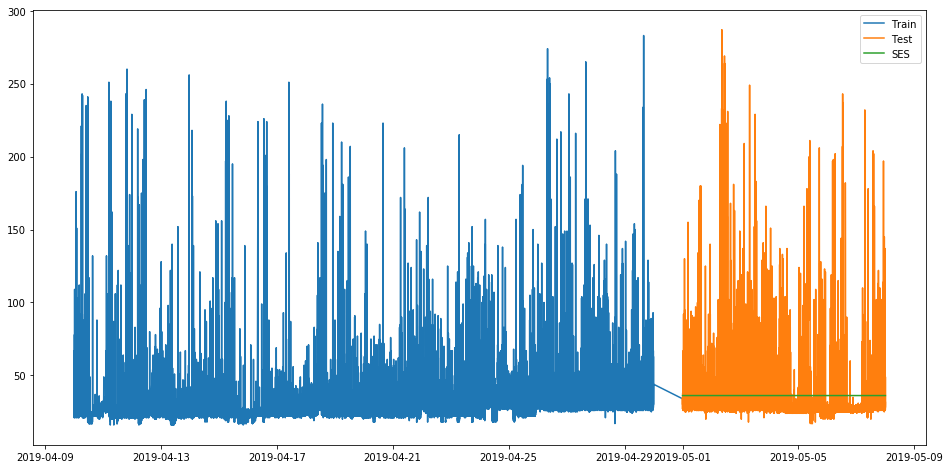

In [288]:
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['value'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [290]:
rms = sqrt(mean_squared_error(test.value, y_hat_avg.SES))
print(rms)


19.26597664284116


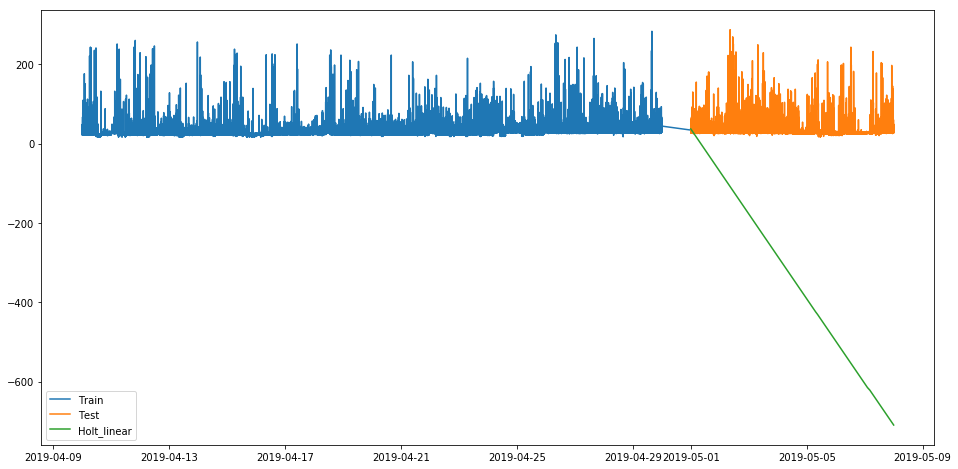

In [292]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['value'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [294]:
rms = sqrt(mean_squared_error(test.value, y_hat_avg.Holt_linear))
print(rms)

427.8690274487521


In [286]:
y_hat['avg'].isna().sum()

10018

In [285]:
y_hat['avg']=train['value'].rolling(10,min_periods=1).mean()

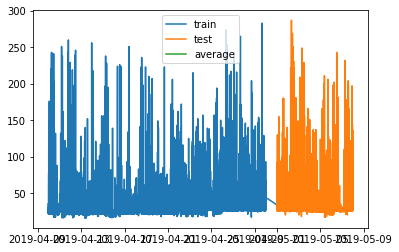

In [280]:
plt.plot(train['value'],label='train')
plt.plot(test['value'],label='test')
plt.plot(y_hat['avg'],label='average')
plt.legend(loc='best')
plt.show()

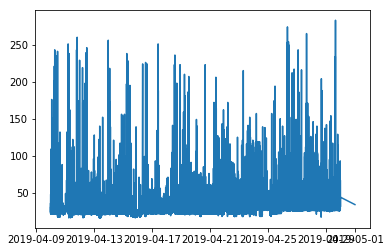

In [308]:
plt.plot(train.value)

In [300]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling( window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [306]:
test['value'].isna().sum()

0

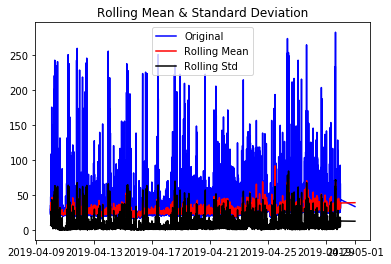

Results of Dickey-Fuller Test:
Test Statistic                -1.282684e+01
p-value                        5.988644e-24
#Lags Used                     4.900000e+01
Number of Observations Used    2.830200e+04
Critical Value (1%)           -3.430581e+00
Critical Value (5%)           -2.861642e+00
Critical Value (10%)          -2.566824e+00
dtype: float64


In [305]:
test_stationarity(train['value'])